In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def load_datasets():
    """Load all CSV files"""
    train_df = pd.read_csv('PV train.csv', header=None, 
                          names=['image_name', 'crop', 'disease'])
    test_seen_df = pd.read_csv('PV test seen.csv', header=None, 
                              names=['image_name', 'crop', 'disease'])
    test_unseen_df = pd.read_csv('PV test unseen.csv', header=None, 
                                names=['image_name', 'crop', 'disease'])
    pd_test_df = pd.read_csv('PD test unseen.csv', header=None, 
                            names=['image_name', 'crop', 'disease'])
    return train_df, test_seen_df, test_unseen_df, pd_test_df

In [ ]:
def analyze_distribution(df, title):
    """Analyze class distribution"""
    print(f"\n=== {title} Analysis ===")
    
    # Crop distribution
    print("\nCrop Distribution:")
    print(df['crop'].value_counts().sort_index())
    
    # Disease distribution
    print("\nDisease Distribution:")
    print(df['disease'].value_counts().sort_index())
    
    # Composition distribution
    df['composition'] = df.apply(lambda x: f"Crop_{x['crop']}_Disease_{x['disease']}", axis=1)
    print("\nTop 10 Compositions:")
    print(df['composition'].value_counts())

In [ ]:
def analyze_combinations(df):
    """Analyze crop-disease combinations"""
    unique_combinations = df.groupby(['crop', 'disease']).size().reset_index()
    print("\nUnique Crop-Disease Combinations:", len(unique_combinations))
    
    # Diseases per crop
    diseases_per_crop = df.groupby('crop')['disease'].nunique()
    print("\nDiseases per Crop:")
    print(diseases_per_crop)
    
    # Crops per disease
    crops_per_disease = df.groupby('disease')['crop'].nunique()
    print("\nCrops per Disease:")
    print(crops_per_disease)

In [ ]:
def analyze_train_test_split(train_df, test_seen_df, test_unseen_df):
    """Analyze training-testing split"""
    print("\n=== Train-Test Split Analysis ===")
    
    print("\nDataset Sizes:")
    print(f"Training samples: {len(train_df)}")
    print(f"Test (seen) samples: {len(test_seen_df)}")
    print(f"Test (unseen) samples: {len(test_unseen_df)}")
    
    # Analyze compositions
    train_comps = set(zip(train_df['crop'], train_df['disease']))
    test_seen_comps = set(zip(test_seen_df['crop'], test_seen_df['disease']))
    test_unseen_comps = set(zip(test_unseen_df['crop'], test_unseen_df['disease']))
    
    print(f"\nUnique compositions in training: {len(train_comps)}")
    print(f"Unique compositions in test (seen): {len(test_seen_comps)}")
    print(f"Unique compositions in test (unseen): {len(test_unseen_comps)}")
    
    # Check overlap
    print(f"\nCompositions overlap between train and test-seen: {len(train_comps & test_seen_comps)}")
    print(f"Compositions overlap between train and test-unseen: {len(train_comps & test_unseen_comps)}")

In [ ]:

def plot_distributions(df, title):
    """Create distribution plots"""
    plt.figure(figsize=(15, 5))
    
    # Crop distribution
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='crop')
    plt.title(f'Crop Distribution - {title}')
    plt.xticks(rotation=45)
    
    # Disease distribution
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='disease')
    plt.title(f'Disease Distribution - {title}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


=== Training Data Analysis ===

Crop Distribution:
crop
0      2202
1      1000
2      1651
3      3095
4      3152
5      4361
6      2099
7      1267
8      1708
9       208
10     1000
11     1503
12     1319
13    14429
Name: count, dtype: int64

Disease Distribution:
disease
0     8237
1      498
2     1368
3      220
4     2451
5      409
6      954
7      798
8     1099
9      828
10    4361
11    3558
12    1663
13    2328
14     931
15     768
16    1456
17    1312
18    1136
19    4312
20     307
Name: count, dtype: int64

Top 10 Compositions:
composition
Crop_5_Disease_10     4361
Crop_13_Disease_19    4312
Crop_6_Disease_11     1819
Crop_13_Disease_11    1739
Crop_13_Disease_13    1560
Crop_11_Disease_4     1503
Crop_13_Disease_16    1456
Crop_13_Disease_17    1312
Crop_7_Disease_0      1267
Crop_13_Disease_18    1136
Name: count, dtype: int64

=== Test (Seen) Data Analysis ===

Crop Distribution:
crop
0      633
1      271
2      255
3      757
4      910
5     1146
6    

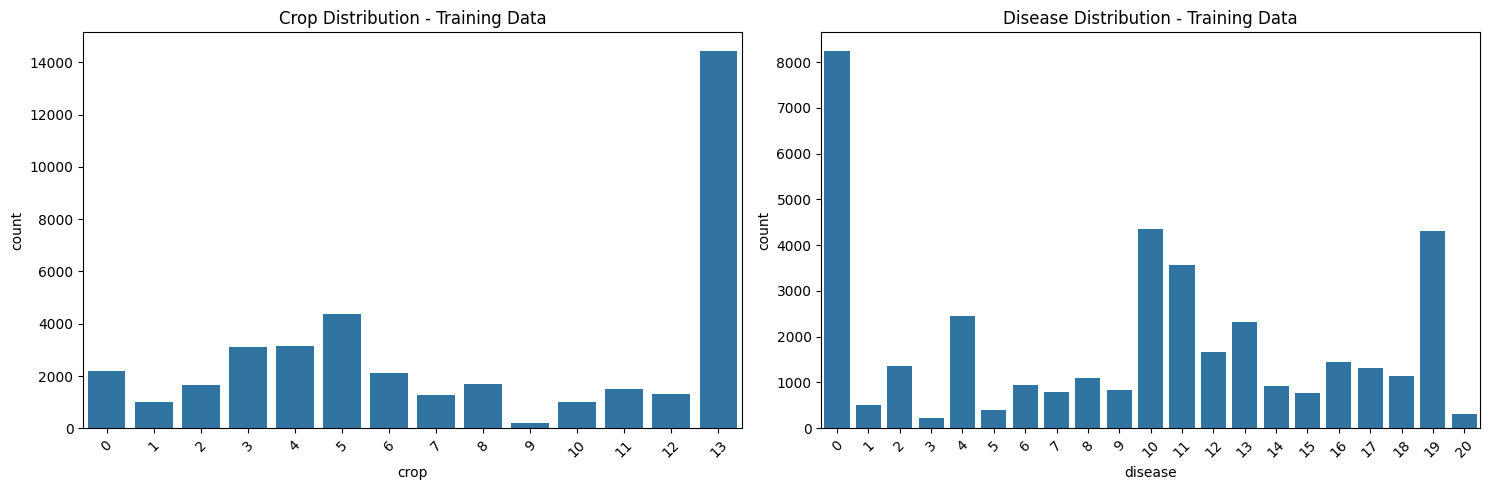

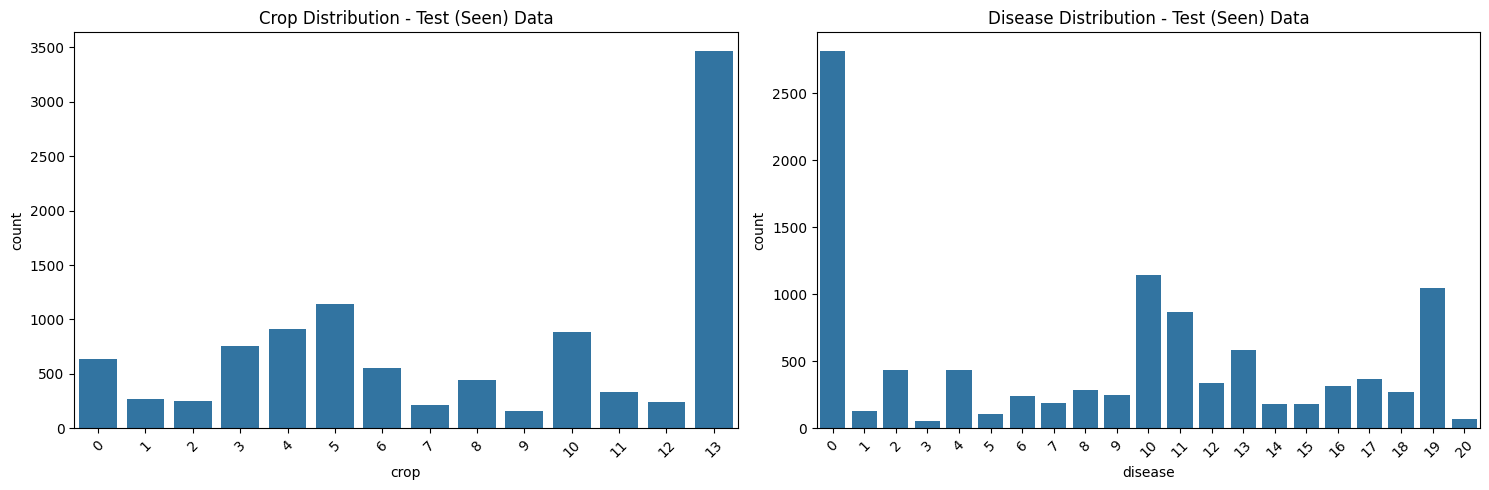

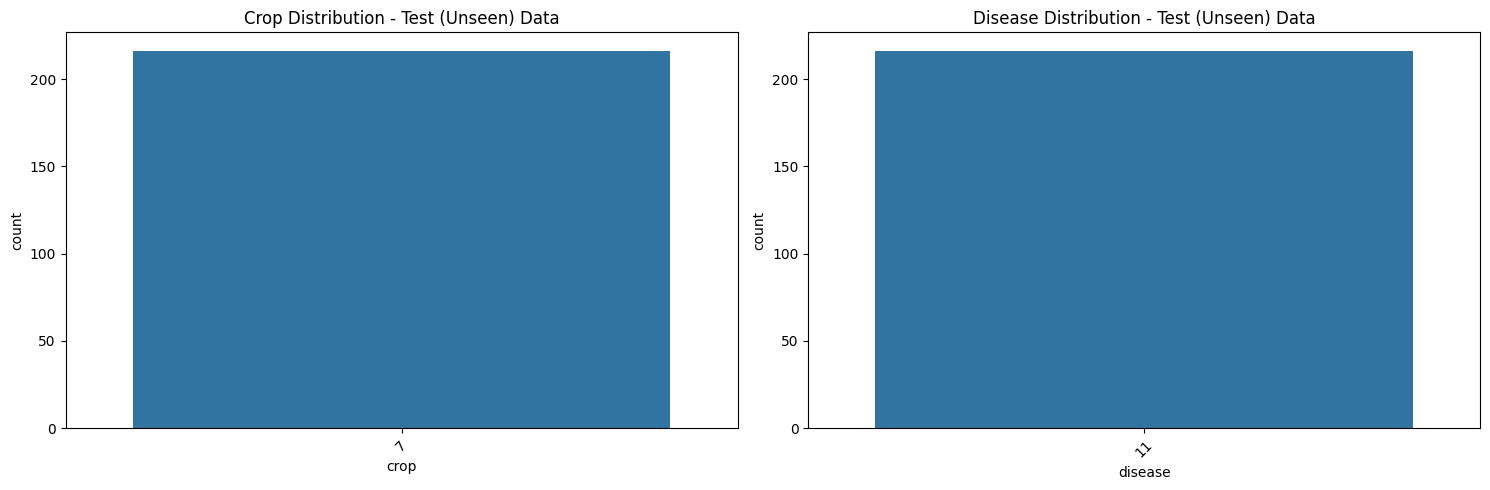

In [ ]:

def main():
    # Load datasets
    train_df, test_seen_df, test_unseen_df, pd_test_df = load_datasets()
    
    # Perform analyses
    analyze_distribution(train_df, "Training Data")
    analyze_distribution(test_seen_df, "Test (Seen) Data")
    analyze_distribution(test_unseen_df, "Test (Unseen) Data")
    analyze_distribution(pd_test_df, "PlantDoc Test Data")
    
    analyze_combinations(train_df)
    analyze_train_test_split(train_df, test_seen_df, test_unseen_df)
    
    # Create visualization
    plot_distributions(train_df, "Training Data")
    plot_distributions(test_seen_df, "Test (Seen) Data")
    plot_distributions(test_unseen_df, "Test (Unseen) Data")

if __name__ == "__main__":
    main()